In [48]:
# load the data
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = "./dataset/user_data/1.jpg"

img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
print("image data type:", img.shape)
print("image shape: ", img.shape)

image data type: (224, 224, 3)
image shape:  (224, 224, 3)


In [49]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# 创建 VGG16 模型实例，加载在 ImageNet 数据集上预训练的权重
model_vgg = VGG16(weights="imagenet", include_top=False)
# 增加一个维度, 到四维, 从 shape (height, width, channels) 扩展为 (1, height, width, channels)
# 模型通常期望一个批量的输入，即使只处理一张图像
x = np.expand_dims(img, axis=0)

# 使用 VGG16 的预处理函数对图像数据进行标准化等处理，以使其符合模型训练时所用的数据格式和范围
x = preprocess_input(x)

# 输出预处理后图像数据的形状，是 (1, height/224, width/224, channels/3)
print(x.shape)

(1, 224, 224, 3)


In [50]:
# 特征提取
# 使用预训练的 VGG 模型对输入数据 x 进行预测
# 预测结果不是最终的分类标签，而是模型在某一层（通常是全连接层之前的最后一层）的输出
# 输出被视为输入数据的特征表示，(batch_size, height, width, channels)
features = model_vgg.predict(x)
# (1, 7, 7, 512)，原始的特征图（feature map）是一个 7x7 的网格，每个网格点有 512 个特征通道
print(type(features), features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
<class 'numpy.ndarray'> (1, 7, 7, 512)


In [51]:
# flatten 到 (batch_size, features_number)
# 多维的特征图转换为一个二维数组，输入到全连接层（或称为密集层）中
features = features.reshape(1, 7 * 7 * 512)
# (1, 25088), 包含一个展平的特征向量
print(type(features), features.shape)

<class 'numpy.ndarray'> (1, 25088)


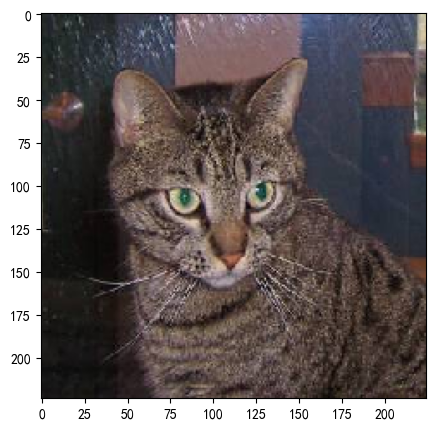

In [52]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

plt.show()

In [53]:
# load image and preprocess it with vgg16 structure
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os

model_vgg = VGG16(weights="imagenet", include_top=False)


# define a method to load and preprocess the image
def process_model(img_path, mlp):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    x_vgg = mlp.predict(x)
    x_vgg = x_vgg.reshape(1, 25088)
    return x_vgg


# 定义一个函数来处理文件夹中的图像
def process_folder(folder_path):
    img_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_paths.append(os.path.join(folder_path, filename))

    features = np.zeros([len(img_paths), 25088])
    for i, img_path in enumerate(img_paths):
        try:
            feature = process_model(img_path, model_vgg)
            print("preprocessed:", img_path)
            features[i] = feature.flatten()  # 假设feature是一个二维数组，需要展平
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    return features, img_paths


# 处理猫和狗的图像文件夹
features1, img_paths_cats = process_folder("dataset/data_vgg/cats")
features2, img_paths_dogs = process_folder("dataset/data_vgg/dogs")

# 根据实际图像数量动态生成标签数组
y1 = np.zeros(len(features1))
y2 = np.ones(len(features2))

# 生成训练数据
X = np.concatenate((features1, features2), axis=0)
y = np.concatenate((y1, y2), axis=0)
y = y.reshape(-1, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
preprocessed: dataset/data_vgg/cats\cat.1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
preprocessed: dataset/data_vgg/cats\cat.10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
preprocessed: dataset/data_vgg/cats\cat.100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
preprocessed: dataset/data_vgg/cats\cat.101.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
preprocessed: dataset/data_vgg/cats\cat.102.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
preprocessed: dataset/data_vgg/cats\cat.103.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
preprocessed: dataset/data_vgg/cats\cat.104.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
preprocessed: dataset/data_vgg/cats\cat.105.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
preprocessed: dataset/data_vgg/cats\cat.106.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
preprocessed: dataset/data_vgg/cats\cat.107.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
preprocessed: dataset/data_vgg/cats\cat.108.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
preproc

In [54]:
print(features1.shape, features2.shape)
print(X.shape, y.shape)

(300, 25088) (300, 25088)
(600, 25088) (600, 1)


In [55]:
# split the training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50
)

print(X_train.shape, X_test.shape, X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [56]:
# set up the mlp mlp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=10, activation="relu", input_dim=25088))
mlp.add(Dense(units=1, activation="sigmoid"))
mlp.summary()

c:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │       250,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,901 (980.08 KB)

 Trainable params: 250,901 (980.08 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
#configure the mlp
mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#train the mlp
mlp.fit(X_train,y_train,epochs=50)

Epoch 1/50


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6186 - loss: 8.8150   
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.3619 
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.2612 
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0706 
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.0207 
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0112 
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0058 
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.3349e-04 
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.3102e-04
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7784e-04 
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5435e-04 
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [58]:
from sklearn.metrics import accuracy_score

y_train_predict = (mlp.predict(X_train) > 0.5).astype("int32")
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1.0


In [59]:
# 测试准确率
y_test_predict = (mlp.predict(X_test) > 0.5).astype("int32")
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.9666666666666667


In [60]:
img_path = "./dataset/user_data/cat.jpg"
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1, 7 * 7 * 512)
result = (mlp.predict(features) > 0.5).astype("int32")

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0]]


In [61]:
# 加载并处理图像
img_path = "./dataset/user_data/dog.jpg"
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

# 使用VGG模型提取特征
features = model_vgg.predict(x)

# VGG16的输出通常是7x7x512的特征图，所以需要重新整形以匹配您的模型的输入
features = features.reshape(1, 7 * 7 * 512)

# 使用提取的特征进行预测
# 假设'mlp'的输入是VGG特征，输出是分类结果（例如，猫或狗）
result = (mlp.predict(features) > 0.5).astype("int32")

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


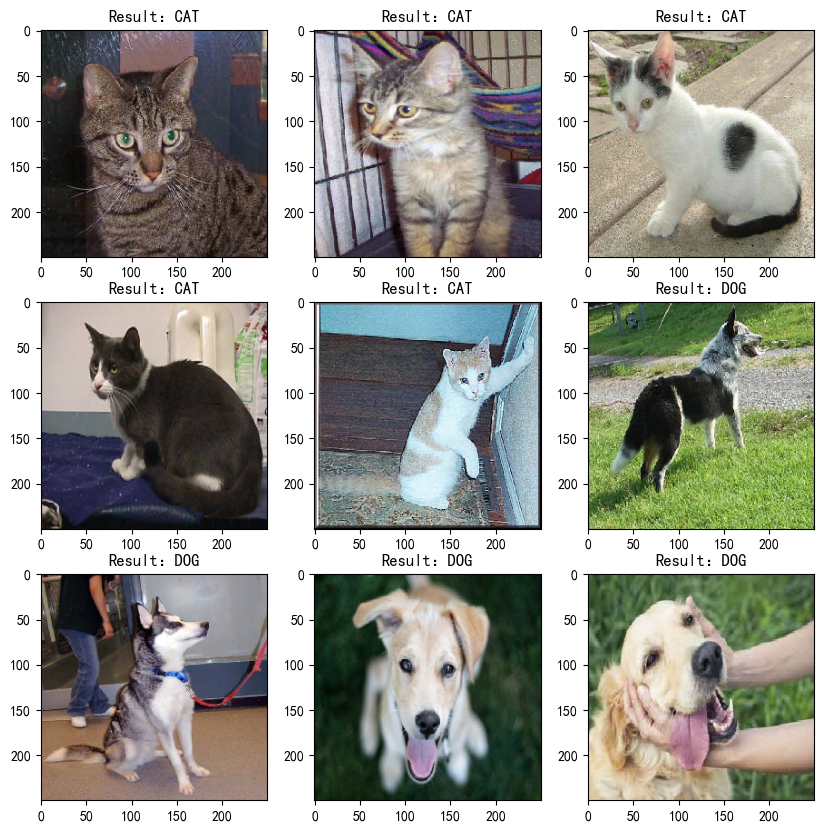

In [62]:
import numpy as np  
from tensorflow.keras.preprocessing.image import load_img, img_to_array  
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16  
import matplotlib.pyplot as plt  
  
  
a = [i for i in range(1, 10)]  
fig = plt.figure(figsize=(10, 10))  
for i in a:  
    img_name = "./dataset/user_data/" + str(i) + ".jpg"  
    img_path = img_name  
    img = load_img(img_path, target_size=(224, 224))  
    img = img_to_array(img)  
    x = np.expand_dims(img, axis=0)  
    x = preprocess_input(x)  
      
    # 假设 model_vgg 是一个已经加载的 VGG16 模型或其他预训练模型  
    x_vgg = model_vgg.predict(x)  
    # 修正了 reshape 的尺寸，因为 25088 可能不适用于所有模型
    x_vgg = x_vgg.reshape(1, -1)    
  
    # 假设 mlp 是一个已经训练好的用于分类猫和狗的模型  
    result = (mlp.predict(x_vgg) > 0.5).astype("int32")  
      
    img_ori = load_img(img_name, target_size=(250, 250))  
    plt.subplot(3, 3, i)  
    plt.imshow(img_ori)  
    plt.title("Result：DOG" if result[0][0] == 1 else "Result：CAT")  
  
plt.show()